## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, learning_curve, RepeatedStratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
%matplotlib inline

## Data Preparation

In [2]:
#Read heart disease dataset
heart_data = pd.read_csv('heart.csv')

In [3]:
print(heart_data.head())
print(heart_data.shape)

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
(918, 12)


In [4]:
# Info of dataset
# Check for NaN/missing values
# Check for count and data types for each column
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
#To print the unique values on each columns in dataset
for column in heart_data.columns:
    print('%s: ' %(column))
    print(heart_data[column].unique(),'\n')

Age: 
[40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71] 

Sex: 
['M' 'F'] 

ChestPainType: 
['ATA' 'NAP' 'ASY' 'TA'] 

RestingBP: 
[140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164] 

Cholesterol: 
[289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 209 260 468 188 518 167 224 172 186 254 306 250 177
 227 230 294 264 259 175 318 216 340 233 205 245 194 270 213 365 342 253
 277 202 297 225 246 412 265 182 218 268 163 529 100 206 238 139 263 291
 229 307 210 329 147  85 269 275 179 392 466 129 241 255 276 282 338 160
 156 272 240 393 161 228 292 388 166 247 331 341 243 279 198 249 168 603
 159 190 185 290 212 231 222 235 320 1

In [6]:
# Extract attributes information
col_list = heart_data.columns.values.tolist()

for col_name in col_list:
    print(heart_data.groupby(col_name).size())
    print("\n")

Age
28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
dtype: int64


Sex
F    193
M    725
dtype: int64


ChestPainType
ASY    496
ATA    173
NAP    203
TA      46
dtype: int64


RestingBP
0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Length: 67, dtype: int64


Cholesterol
0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Length: 222, dtype: int64


FastingBS
0    704
1    214
dtype: int64


RestingECG
LVH       188
Normal    552
ST        178
dtype: int64


Ma

In [7]:
import plotly.express as px

# Assuming heart_data is a pandas DataFrame with your data
columns = heart_data.columns

for column in columns:
    fig = px.histogram(heart_data, x=column, color=column, 
                       title=f"Distribution of {column}",
                       labels={column: column})

    fig.update_layout(
        title={
            'text': f"Distribution of {column}",
            'y':1,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        xaxis_title=column,
        yaxis_title="Count",
        font=dict(
            family="Courier New, monospace",
            size=18,
            color="#8f8f8f"
        )
    )
    fig.show()


In [8]:
#performing mapping or encoding operations
heart_data['Sex']=heart_data['Sex'].map({'M':0,'F':1})
heart_data['ChestPainType']=heart_data['ChestPainType'].map({'ATA' :0,'NAP':1, 'ASY':2, 'TA':3})
heart_data['RestingECG']=heart_data['RestingECG'].map({'Normal' :0,'ST':1 ,'LVH':2})
heart_data['ExerciseAngina']=heart_data['ExerciseAngina'].map({'N':0,'Y':1})
heart_data['ST_Slope']=heart_data['ST_Slope'].map({'Up':0, 'Flat':1, 'Down':2})
heart_data.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    0              0        140          289          0           0   
1   49    1              1        160          180          0           0   
2   37    0              0        130          283          0           1   
3   48    1              2        138          214          0           0   
4   54    0              1        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         0             0  
1    156               0      1.0         1             1  
2     98               0      0.0         0             0  
3    108               1      1.5         1             1  
4    122               0      0.0         0             0

In [9]:
# Remove duplicated rows of data
print("Heart Diseases Prediction data")
print("Number of duplicated rows: ", heart_data.duplicated().sum())
heart_data = heart_data.drop_duplicates()
print("Number of duplicated rows (After Dropping Duplicated Rows): ", heart_data.duplicated().sum())

Heart Diseases Prediction data
Number of duplicated rows:  0
Number of duplicated rows (After Dropping Duplicated Rows):  0


In [10]:
heart_data.describe()

Age         Sex  ChestPainType   RestingBP  Cholesterol  \
count  918.000000  918.000000     918.000000  918.000000   918.000000   
mean    53.510893    0.210240       1.452070  132.396514   198.799564   
std      9.432617    0.407701       0.851832   18.514154   109.384145   
min     28.000000    0.000000       0.000000    0.000000     0.000000   
25%     47.000000    0.000000       1.000000  120.000000   173.250000   
50%     54.000000    0.000000       2.000000  130.000000   223.000000   
75%     60.000000    0.000000       2.000000  140.000000   267.000000   
max     77.000000    1.000000       3.000000  200.000000   603.000000   

        FastingBS  RestingECG       MaxHR  ExerciseAngina     Oldpeak  \
count  918.000000  918.000000  918.000000      918.000000  918.000000   
mean     0.233115    0.603486  136.809368        0.404139    0.887364   
std      0.423046    0.805968   25.460334        0.490992    1.066570   
min      0.000000    0.000000   60.000000        0.000000   -2.600000   
25%      0.000000    0.000000  120.000000        0.000000    0.000000   
50%      0.000000    0.000000  138.000000        0.000000    0.600000   
75%      0.000000    1.000000  156.000000        1.000000    1.500000   
max      1.000000    2.000000  202.000000        1.000000    6.200000   

         ST_Slope  HeartDisease  
count  918.000000    918.000000  
mean     0.638344      0.553377  
std      0.607056      0.497414  
min      0.000000      0.000000  
25%      0.000000      0.000000  
50%      1.000000      1.000000  
75%      1.000000      1.000000  
max      2.000000      1.000000

['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


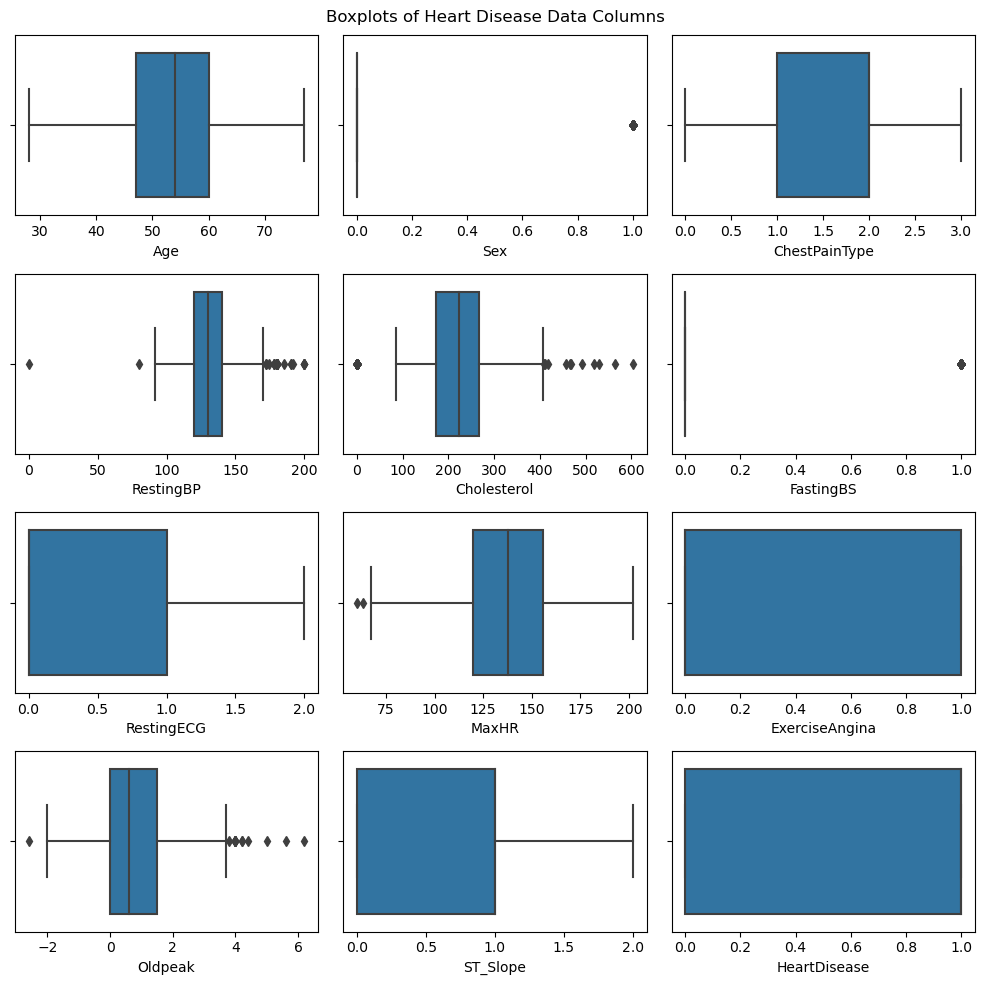

In [11]:
# Boxplot 
# List all the columns with numerical values
numeric_cols = heart_data.select_dtypes(include=['number']).columns.tolist()
print(numeric_cols)

#create a subplot of boxplots for each column in the dataset
fig, axs = plt.subplots(4, 3, figsize=(10, 10))
fig.suptitle("Boxplots of Heart Disease Data Columns")
i = 0
j = 0

for column in heart_data.columns:
    sns.boxplot(data=heart_data, x=column, ax=axs[i, j])
    j = j + 1
    if j > 2:
        i = i + 1
        j = 0

plt.tight_layout()


In [12]:
#Replaces the outliers in the specified columns with either the median or mean value of the respective column
#Replaces the outliers in the specified columns with median value
def replace_outliers_with_median_or_mean(data, columns, minOut, MaxOut, method):
    modified_data = data.copy()
    
    for column in columns:
        feature_data = data[column]
        
        if method == 'median':
            outliers = (feature_data < minOut) | (feature_data > MaxOut)
            modified_data.loc[outliers, column] = np.median(feature_data)
        elif method == 'mean':
            outliers = (feature_data < minOut) | (feature_data > MaxOut)
            modified_data.loc[outliers, column] = np.mean(feature_data)
        else:
            raise ValueError("Invalid method. Choose either 'median' or 'mean'.")
    
    return modified_data

heart_data = replace_outliers_with_median_or_mean(heart_data, ['RestingBP'], 50, 200, method='median')
heart_data = replace_outliers_with_median_or_mean(heart_data, ['Cholesterol'], 30, 550, method='median')
print("\nDataset with Outliers Replaced:\n", heart_data)





Dataset with Outliers Replaced:
      Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0     40    0              0        140          289          0           0   
1     49    1              1        160          180          0           0   
2     37    0              0        130          283          0           1   
3     48    1              2        138          214          0           0   
4     54    0              1        150          195          0           0   
..   ...  ...            ...        ...          ...        ...         ...   
913   45    0              3        110          264          0           0   
914   68    0              2        144          193          1           0   
915   57    0              2        130          131          0           0   
916   57    1              0        130          236          0           2   
917   38    0              1        138          175          0           0   

     MaxHR  Exerc

['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


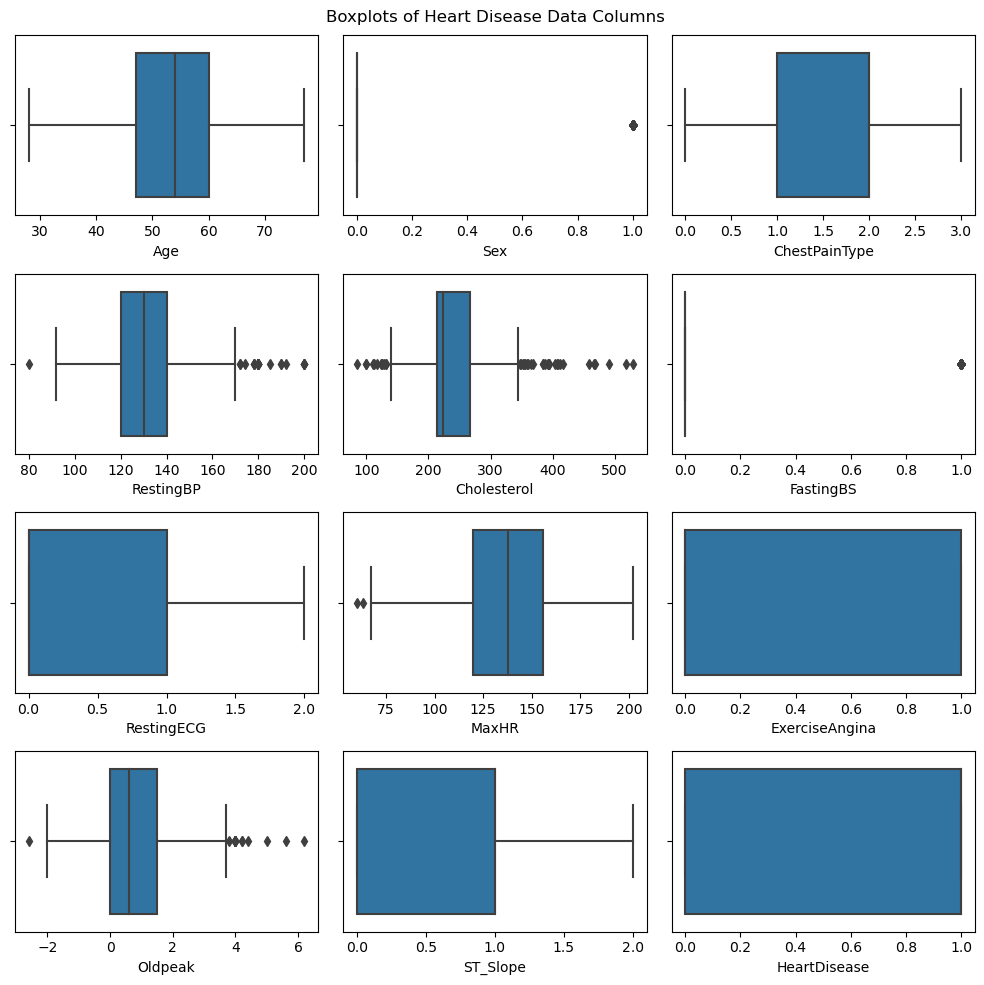

In [13]:
# Boxplot 
# List all the columns with numerical values
numeric_cols = heart_data.select_dtypes(include=['number']).columns.tolist()
print(numeric_cols)

#create a subplot of boxplots for each column in the dataset
fig, axs = plt.subplots(4, 3, figsize=(10, 10))
fig.suptitle("Boxplots of Heart Disease Data Columns")
i = 0
j = 0

for column in heart_data.columns:
    sns.boxplot(data=heart_data, x=column, ax=axs[i, j])
    j = j + 1
    if j > 2:
        i = i + 1
        j = 0

plt.tight_layout()

In [14]:
# Correlation matrix used to find the correlation between the features and the target variable
# Check the correlation coefficients to see which variables are highly correlated
corr_matrix = heart_data.corr()

fig = go.Figure(data=go.Heatmap(z=corr_matrix.values,
                                 x=corr_matrix.index.values,
                                 y=corr_matrix.columns.values,
                                 colorscale='Viridis',
                                 colorbar=dict(title='Correlation'),
                                 showscale=True,
                                 zmin=-1,
                                 zmax=1))

fig.update_layout(title='Correlation Matrix Heatmap',
                  font=dict(size=14),
                  plot_bgcolor='rgb(245,245,245)',
                  paper_bgcolor='rgb(245,245,245)')

annotations = []
for i, row in enumerate(corr_matrix.values):
    for j, value in enumerate(row):
        if abs(value) >= 0.5:
            color = 'white'
        else:
            color = 'black'
        annotations.append(dict(text='{:.2f}'.format(value),
                                x=corr_matrix.columns[j],
                                y=corr_matrix.index[i],
                                font=dict(size=12, color=color),
                                showarrow=False,
                                xanchor='center',
                                yanchor='middle'))

fig.update_layout(annotations=annotations)

fig.show()


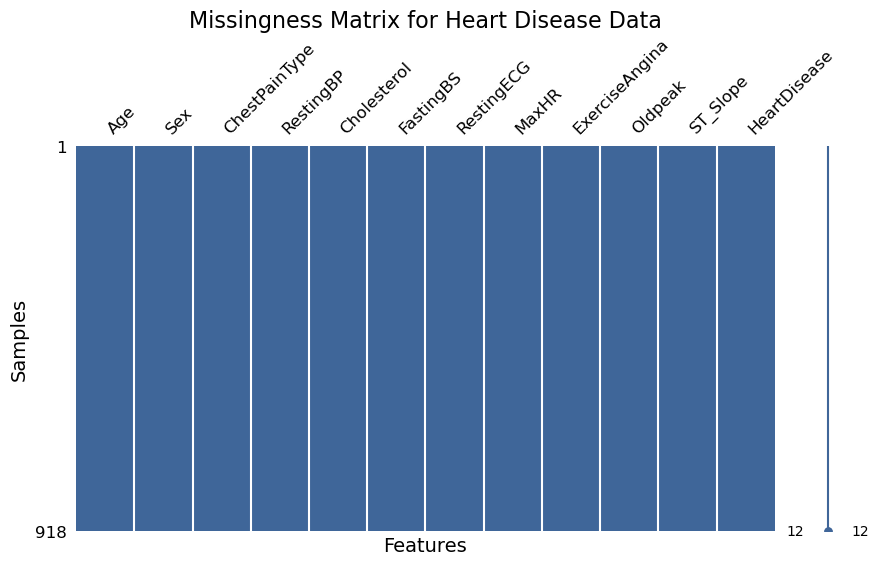

In [15]:
import missingno as msno

# plot the missingness matrix
msno.matrix(heart_data, figsize=(10,5), fontsize=12, color=(0.25, 0.4, 0.6))

# add a title and adjust font sizes
plt.title("Missingness Matrix for Heart Disease Data", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Samples", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# show the plot
plt.show()

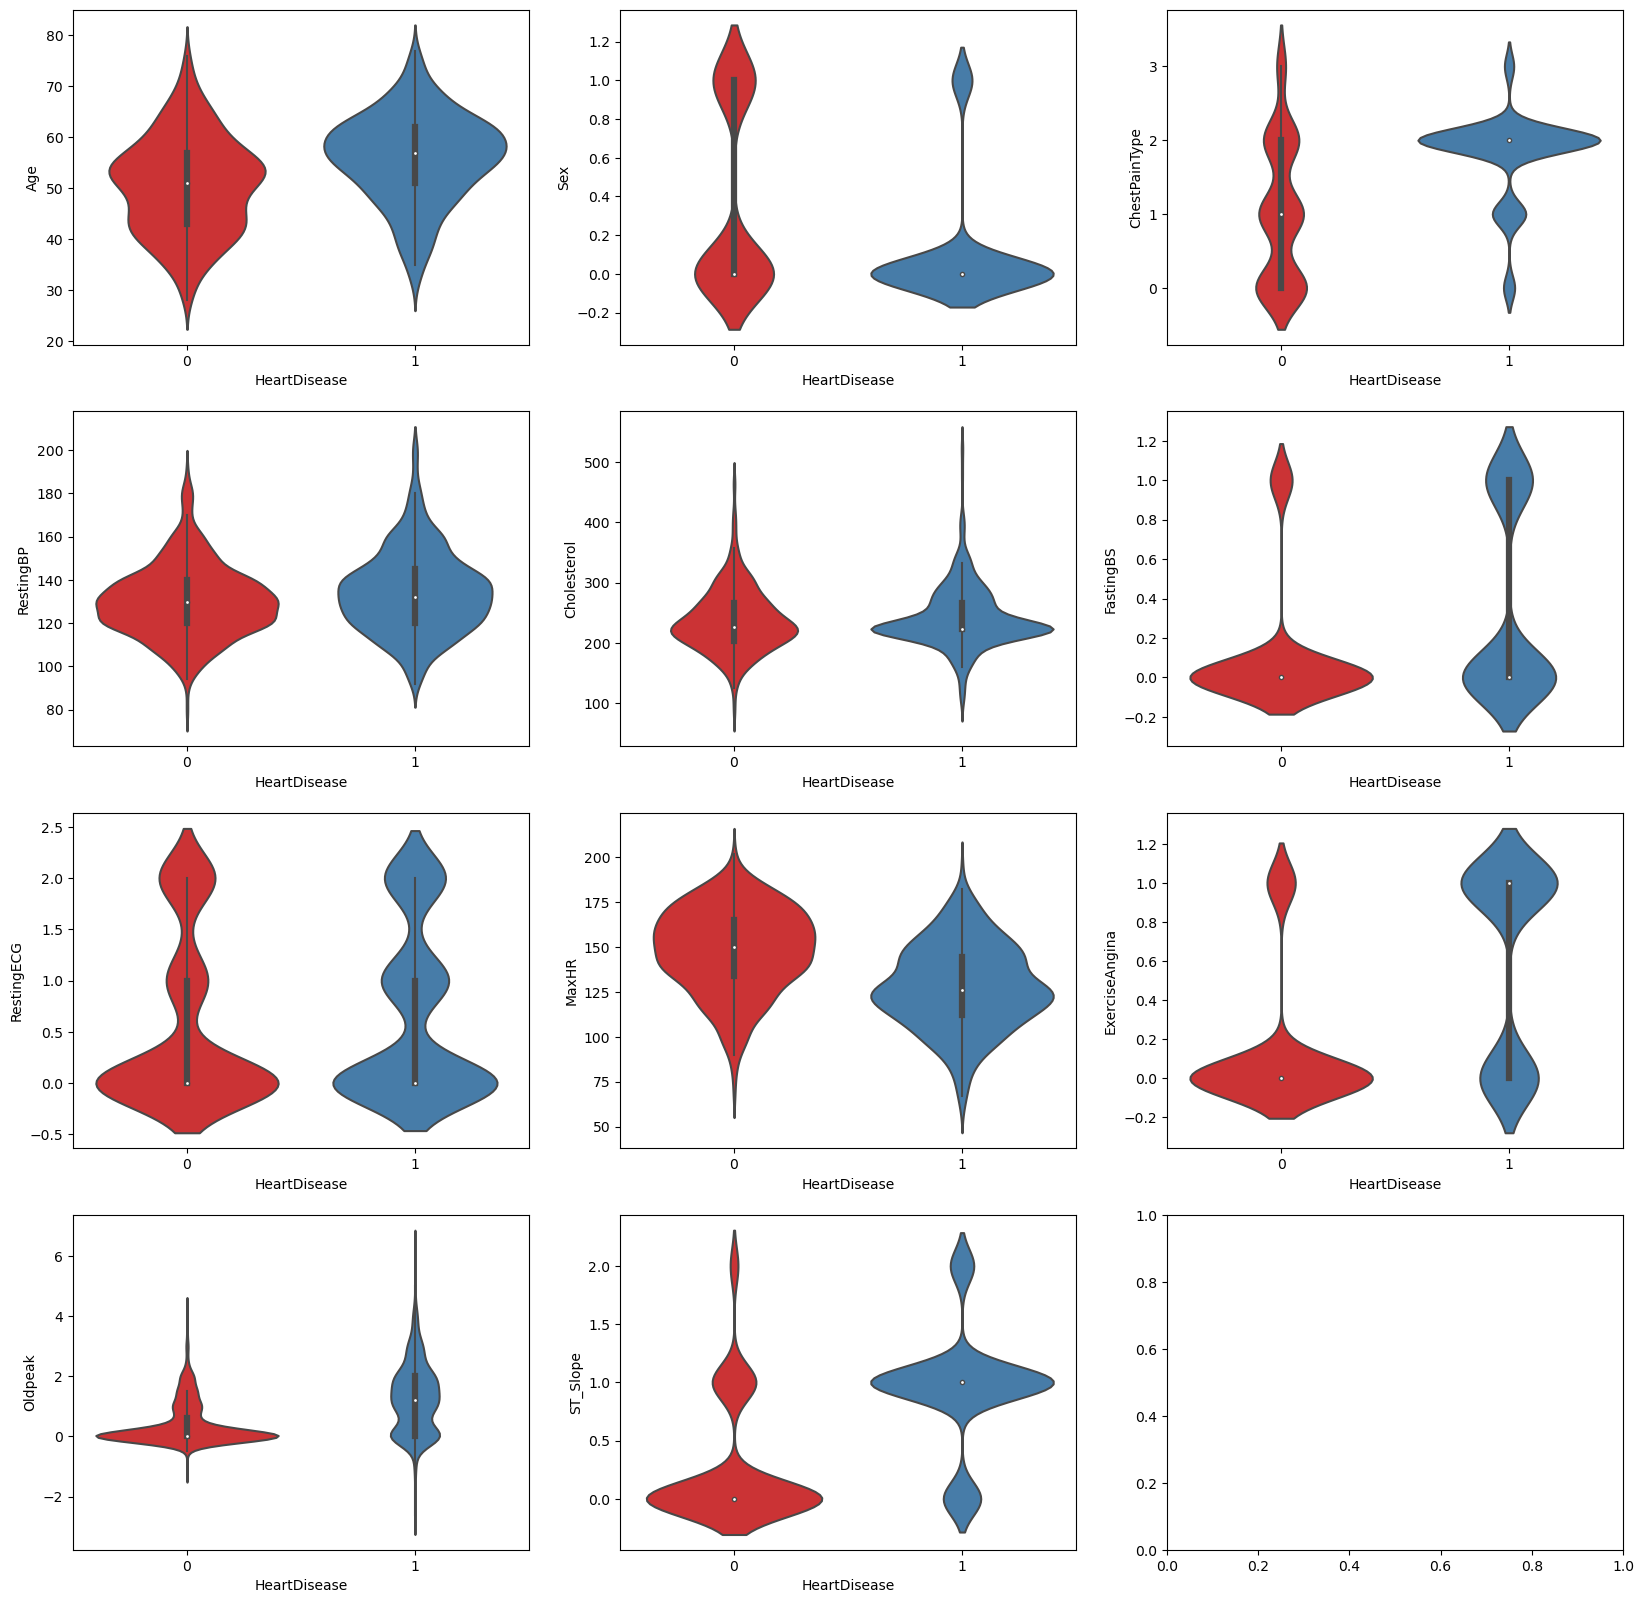

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt


# Set up the figure
fig, axs = plt.subplots(ncols=3, nrows=4, figsize=(20, 20))
axs = axs.flatten()

# Loop through each variable and create a violin plot
for i, column in enumerate(heart_data.columns[:-1]):
    sns.violinplot(x='HeartDisease', y=column, data=heart_data, ax=axs[i], palette='Set1')

# Show the plot
plt.show()

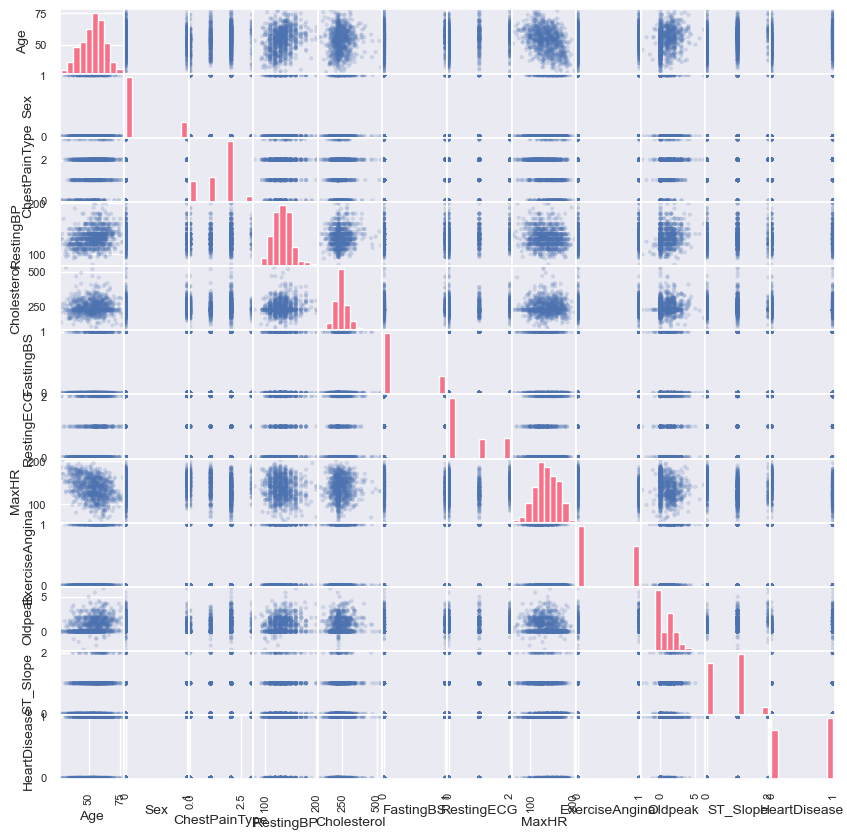

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot size
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Set plot colors
sns.set_palette("husl")

# Plot scatter matrix with variable names on diagonal plots
scatter_matrix = pd.plotting.scatter_matrix(heart_data, alpha=0.2, diagonal='hist', grid=True, figsize=(10,10), color="b")
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 90)
plt.show()

In [18]:
#Split data into X and y
X=heart_data.drop('HeartDisease',axis = 1)
y=heart_data['HeartDisease']
X.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    0              0        140          289          0           0   
1   49    1              1        160          180          0           0   
2   37    0              0        130          283          0           1   
3   48    1              2        138          214          0           0   
4   54    0              1        150          195          0           0   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0    172               0      0.0         0  
1    156               0      1.0         1  
2     98               0      0.0         0  
3    108               1      1.5         1  
4    122               0      0.0         0

## Model Development

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training data further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation and test data using the fitted scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

X_train.shape,X_val.shape,X_test.shape,y_train.shape,y_val.shape,y_test.shape

((587, 11), (147, 11), (184, 11), (587,), (147,), (184,))

In [20]:
models = [
    SVC(),
    LogisticRegression(max_iter=1000),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    AdaBoostClassifier()
]


In [21]:
from tabulate import tabulate

table = []
for model in models:
    model.fit(X_train_scaled, y_train)  # Train the model
    train_predictions = model.predict(X_train_scaled)
    test_predictions = model.predict(X_test_scaled)
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    # Evaluate the model on the X_val and y_val data
    val_predictions = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    table.append([type(model).__name__, test_accuracy, train_accuracy, val_accuracy])

print(tabulate(table, headers=['Model', 'Test Accuracy', 'Train Accuracy', 'Validation Accuracy']))


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but SVC was fitted without feature names

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but GradientBoostingClassifier was fitted without feature names



Model                         Test Accuracy    Train Accuracy    Validation Accuracy
--------------------------  ---------------  ----------------  ---------------------
SVC                                0.842391          0.894378               0.544218
LogisticRegression                 0.815217          0.850085               0.455782
GradientBoostingClassifier         0.858696          0.948893               0.693878
RandomForestClassifier             0.858696          1                      0.687075
DecisionTreeClassifier             0.722826          1                      0.442177
KNeighborsClassifier               0.847826          0.877342               0.632653
GaussianNB                         0.793478          0.834753               0.482993
AdaBoostClassifier                 0.853261          0.879046               0.544218


C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but RandomForestClassifier was fitted without feature names

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but GaussianNB was fitted without feature names

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning:

X has feature names, but AdaBoostClassifier was fitted without feature names



## Model Tuning

In [22]:
models = [
        {
            "name": "SVM",
            "estimator": SVC(),
            "hyperparameters": {
            "C": [0.1, 1, 10, 20, 100, 1000, 2000, 2200], 
            "gamma": [1, 0.1, 0.01, 0.001, 0.0001, 0.00001],
            "kernel": ['rbf']    
            }
    },
    {
        "name": "Logistic Regression",
        "estimator": LogisticRegression(),
        "hyperparameters": {
            "penalty": ["l1", "l2"],
            "C": [0.01, 0.1, 1, 10, 20],
            "max_iter": [500, 600]
        }
    },
  {
        "name": "Gradient Boosting",
        "estimator": GradientBoostingClassifier(),
        "hyperparameters": {
            "n_estimators": [90, 95, 100, 150],
            "learning_rate": [0.01 ,0.1, 0.5],
            "max_depth": [2, 3, 5]
        }
    },
    {
        "name": "Random Forest",
        "estimator": RandomForestClassifier(),
        "hyperparameters": {
            "n_estimators": [50, 100, 200, 300],
            "max_depth": [3, 4, 5, 6, 10],
            "min_samples_split": [1, 2, 3, 5, 10],
            "min_samples_leaf": [1, 2, 4, 6]
        }
    },
    {
        "name": "Decision Tree",
        "estimator": DecisionTreeClassifier(),
        "hyperparameters": {
            "criterion": ["gini", "entropy"],
            "max_depth": [1, 3, 5, 10],
            "min_samples_split": [1, 2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    {
        "name": "K-Nearest Neighbors",
        "estimator": KNeighborsClassifier(),
        "hyperparameters": {
            "n_neighbors": [3, 5, 7, 9],
            "weights": ["uniform", "distance"],
            "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
        }
    },
    {
        "name": "Naive Bayes",
        "estimator": GaussianNB(),
        "hyperparameters": {
            "var_smoothing": [1e-9, 1e-10, 1e-11, 1e-12]
        }
    },


    {
            "name": "AdaBoost",
            "estimator": AdaBoostClassifier(),
            "hyperparameters": {
            "n_estimators": [50, 100, 200, 250, 300],
            "learning_rate": [0.01, 0.1, 0.25, 0.5, 1],
            "algorithm": ["SAMME", "SAMME.R"]
        }
    },  
]

In [23]:
from sklearn.metrics import classification_report
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV
from sklearn.metrics import roc_auc_score
import warnings

accuracies = []
train_accuracies = []
best_models = {}

for idx, model in enumerate(models):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        print(f"Training {model['name']}...")
        
        # Perform grid search with cross-validation
        grid_search = GridSearchCV(
            estimator=model['estimator'],
            param_grid=model['hyperparameters'],
            scoring='accuracy',
            cv=10
        )
        grid_search.fit(X_train_scaled, y_train)

        # evaluate the model's performance
        best_model = grid_search.best_estimator_

        # Calculate training accuracy
        y_train_pred = best_model.predict(X_train_scaled)
        train_accuracy = accuracy_score(y_train, y_train_pred)
        train_accuracies.append((model['name'], train_accuracy))

        # Calculate testing accuracy
        y_test_pred = best_model.predict(X_test_scaled)
        test_accuracy = accuracy_score(y_test, y_test_pred)
        accuracies.append((model['name'], test_accuracy))
        
        # Calculate the cross validation
        cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
        cross_validation_scores = cross_val_score(
            best_model, X_train_scaled, y_train, cv=cv, scoring='accuracy'
        )
        cross_validation_score = cross_validation_scores.mean()

        best_models[model['name']] = best_model

        print(f"Best parameters for {model['name']}:{grid_search.best_params_}")
        print("\033[1m--------------------------------------------------------\033[0m")
        print(f"Training accuracy for {model['name']}:{train_accuracy}")
        print("\033[1m--------------------------------------------------------\033[0m")
        print(f"Testing accuracy for {model['name']}:{test_accuracy}")
        print("\033[1m--------------------------------------------------------\033[0m")
        print(f"Cross Validation Score {model['name']}: {'{0:.2%}'.format(cross_validation_score)}")
        print("\033[1m--------------------------------------------------------\033[0m")

Training SVM...
Best parameters for SVM:{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
--------------------------------------------------------
Training accuracy for SVM:0.8722316865417377
--------------------------------------------------------
Testing accuracy for SVM:0.8315217391304348
--------------------------------------------------------
Cross Validation Score SVM: 84.67%
--------------------------------------------------------
Training Logistic Regression...
Best parameters for Logistic Regression:{'C': 0.01, 'max_iter': 500, 'penalty': 'l2'}
--------------------------------------------------------
Training accuracy for Logistic Regression:0.8449744463373083
--------------------------------------------------------
Testing accuracy for Logistic Regression:0.8152173913043478
--------------------------------------------------------
Cross Validation Score Logistic Regression: 83.98%
--------------------------------------------------------
Training Gradient Boosting...
Best parameters

In [34]:
# create the SVM model with the hyperparameters
svm_model = SVC(
    C= 1000, 
    gamma= 0.001,
    kernel= 'rbf',
)

log_reg_model = LogisticRegression(
    C=0.01,
    max_iter=500,
    penalty='l2'
)

# create the Gradient Boosting model with the best hyperparameters
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,
    max_depth=2,
    n_estimators=100
)

# create the Random Forest model with the best hyperparameters
rf_model = RandomForestClassifier(
    max_depth=3,
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=200
)

# create the Decision Tree model with the best hyperparameters
dt_model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=1,
    min_samples_leaf=1,
    min_samples_split=2
)

# create the K-Nearest Neighbors model with the best hyperparameters
knn_model = KNeighborsClassifier(
    algorithm='auto',
    n_neighbors=7,
    weights='uniform'
)

# create the Naive Bayes model with the best hyperparameters
nb_model = GaussianNB(
    var_smoothing=1e-09
)

# create the AdaBoost model with the best hyperparameters
ab_model = AdaBoostClassifier(
    algorithm='SAMME',
    learning_rate=0.25,
    n_estimators=200
)


In [35]:
# Train SVM model
svm_model.fit(X_train_scaled, y_train)

# Train Logistic Regression model
log_reg_model.fit(X_train_scaled, y_train)

# Train Gradient Boosting model
gb_model.fit(X_train_scaled, y_train)

# Train Random Forest model
rf_model.fit(X_train_scaled, y_train)

# Train Decision Tree model
dt_model.fit(X_train_scaled, y_train)

# Train K-Nearest Neighbors model
knn_model.fit(X_train_scaled, y_train)

# Train Naive Bayes model
nb_model.fit(X_train_scaled, y_train)

# Train AdaBoost model
ab_model.fit(X_train_scaled, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.25, n_estimators=200)

In [36]:
from sklearn.metrics import accuracy_score

# define the models and their names
models = {
    'SVM': svm_model,
    'Logistic Regression': log_reg_model,
    'Gradient Boosting': gb_model,
    'Random Forest': rf_model,
    'Decision Tree': dt_model,
    'K-Nearest Neighbors': knn_model,
    'AdaBoost': ab_model
}

# initialize an empty list to store the accuracy scores
accuracy_scores = []
train_accuracy_scores = []
cv_scores = []

# iterate over the models and calculate the accuracy score for each model
for name, model in models.items():
    y_pred_train = model.predict(X_train_scaled)
    train_accuracy = accuracy_score(y_train, y_pred_train)
    y_pred_test = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred_test)
    accuracy_scores.append(accuracy)
    train_accuracy_scores.append(train_accuracy)
    
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    cross_validation_score = cross_val_score(model,X_train_scaled,y_train,cv = cv,scoring = 'accuracy').mean()
    cv_scores.append(cross_validation_score)

# print the table with the model names and their accuracy scores
table = []
for name, accuracy, train_accuracy, cv_scores in zip(models.keys(), accuracy_scores, train_accuracy_scores, cv_scores):
    table.append([name, accuracy, train_accuracy, cv_scores])
print(tabulate(table, headers=['Model', 'Test Accuracy', 'Train Accuracy', 'Cross Validation']))

Model                  Test Accuracy    Train Accuracy    Cross Validation
-------------------  ---------------  ----------------  ------------------
SVM                         0.831522          0.872232            0.846659
Logistic Regression         0.815217          0.844974            0.839801
Gradient Boosting           0.853261          0.902896            0.850633
Random Forest               0.831522          0.86201             0.845509
Decision Tree               0.798913          0.802385            0.802387
K-Nearest Neighbors         0.842391          0.867121            0.850614
AdaBoost                    0.858696          0.868825            0.856293


## Model Evaluation

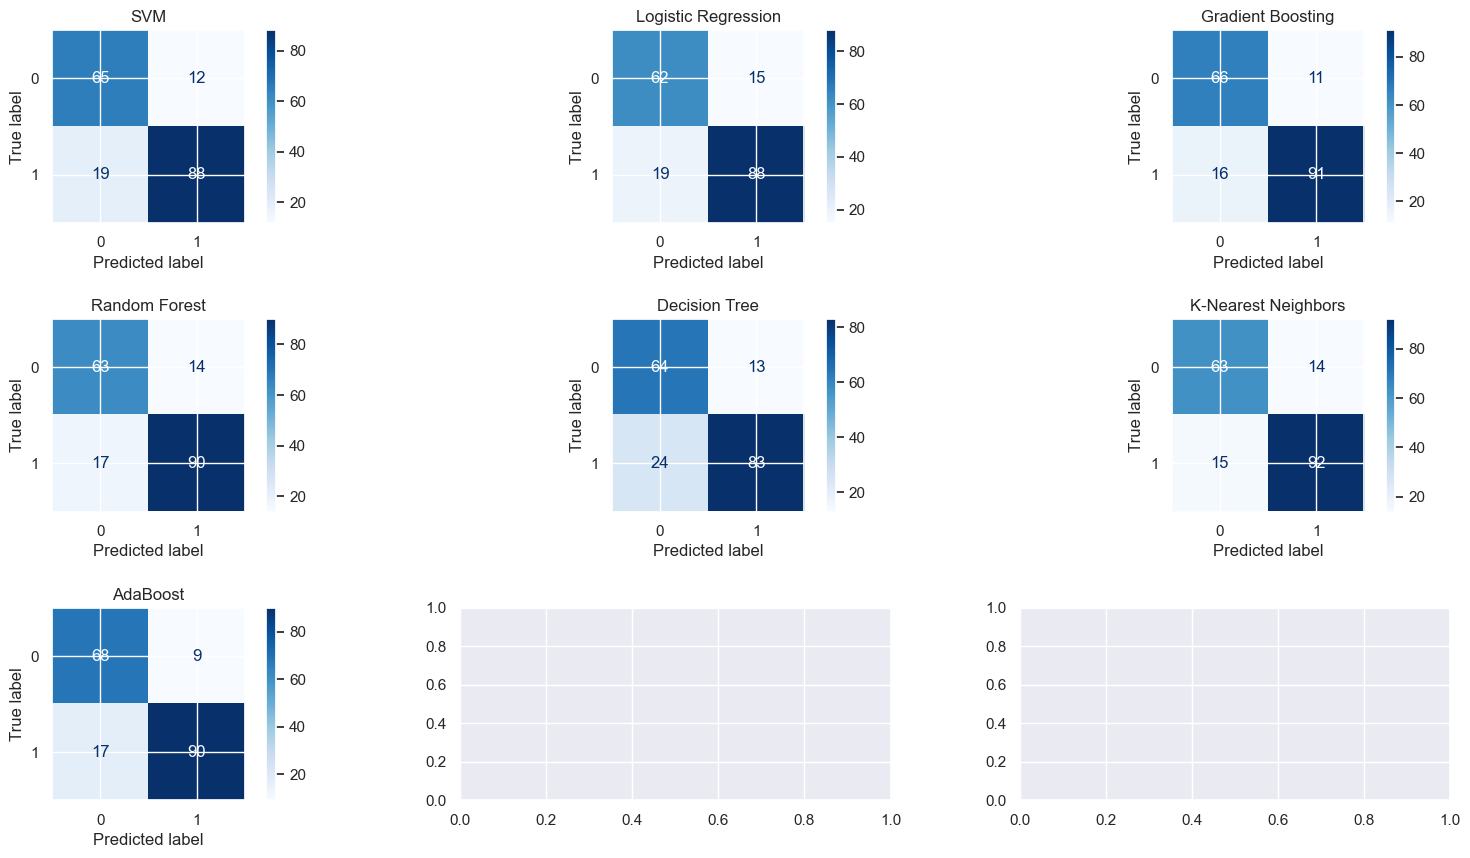

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# define the models and their names
models = {
    'SVM': svm_model,
    'Logistic Regression': log_reg_model,
    'Gradient Boosting': gb_model,
    'Random Forest': rf_model,
    'Decision Tree': dt_model,
    'K-Nearest Neighbors': knn_model,
    'AdaBoost': ab_model
}

# create a subplot grid with 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

# iterate over the models and plot the confusion matrix in the corresponding subplot
for i, (name, model) in enumerate(models.items()):
    row = i // 3
    col = i % 3
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test_scaled, y_test, cmap='Blues', ax=axs[row, col])
    disp.ax_.set_title(name)

# adjust the layout
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# show the plot
plt.show()

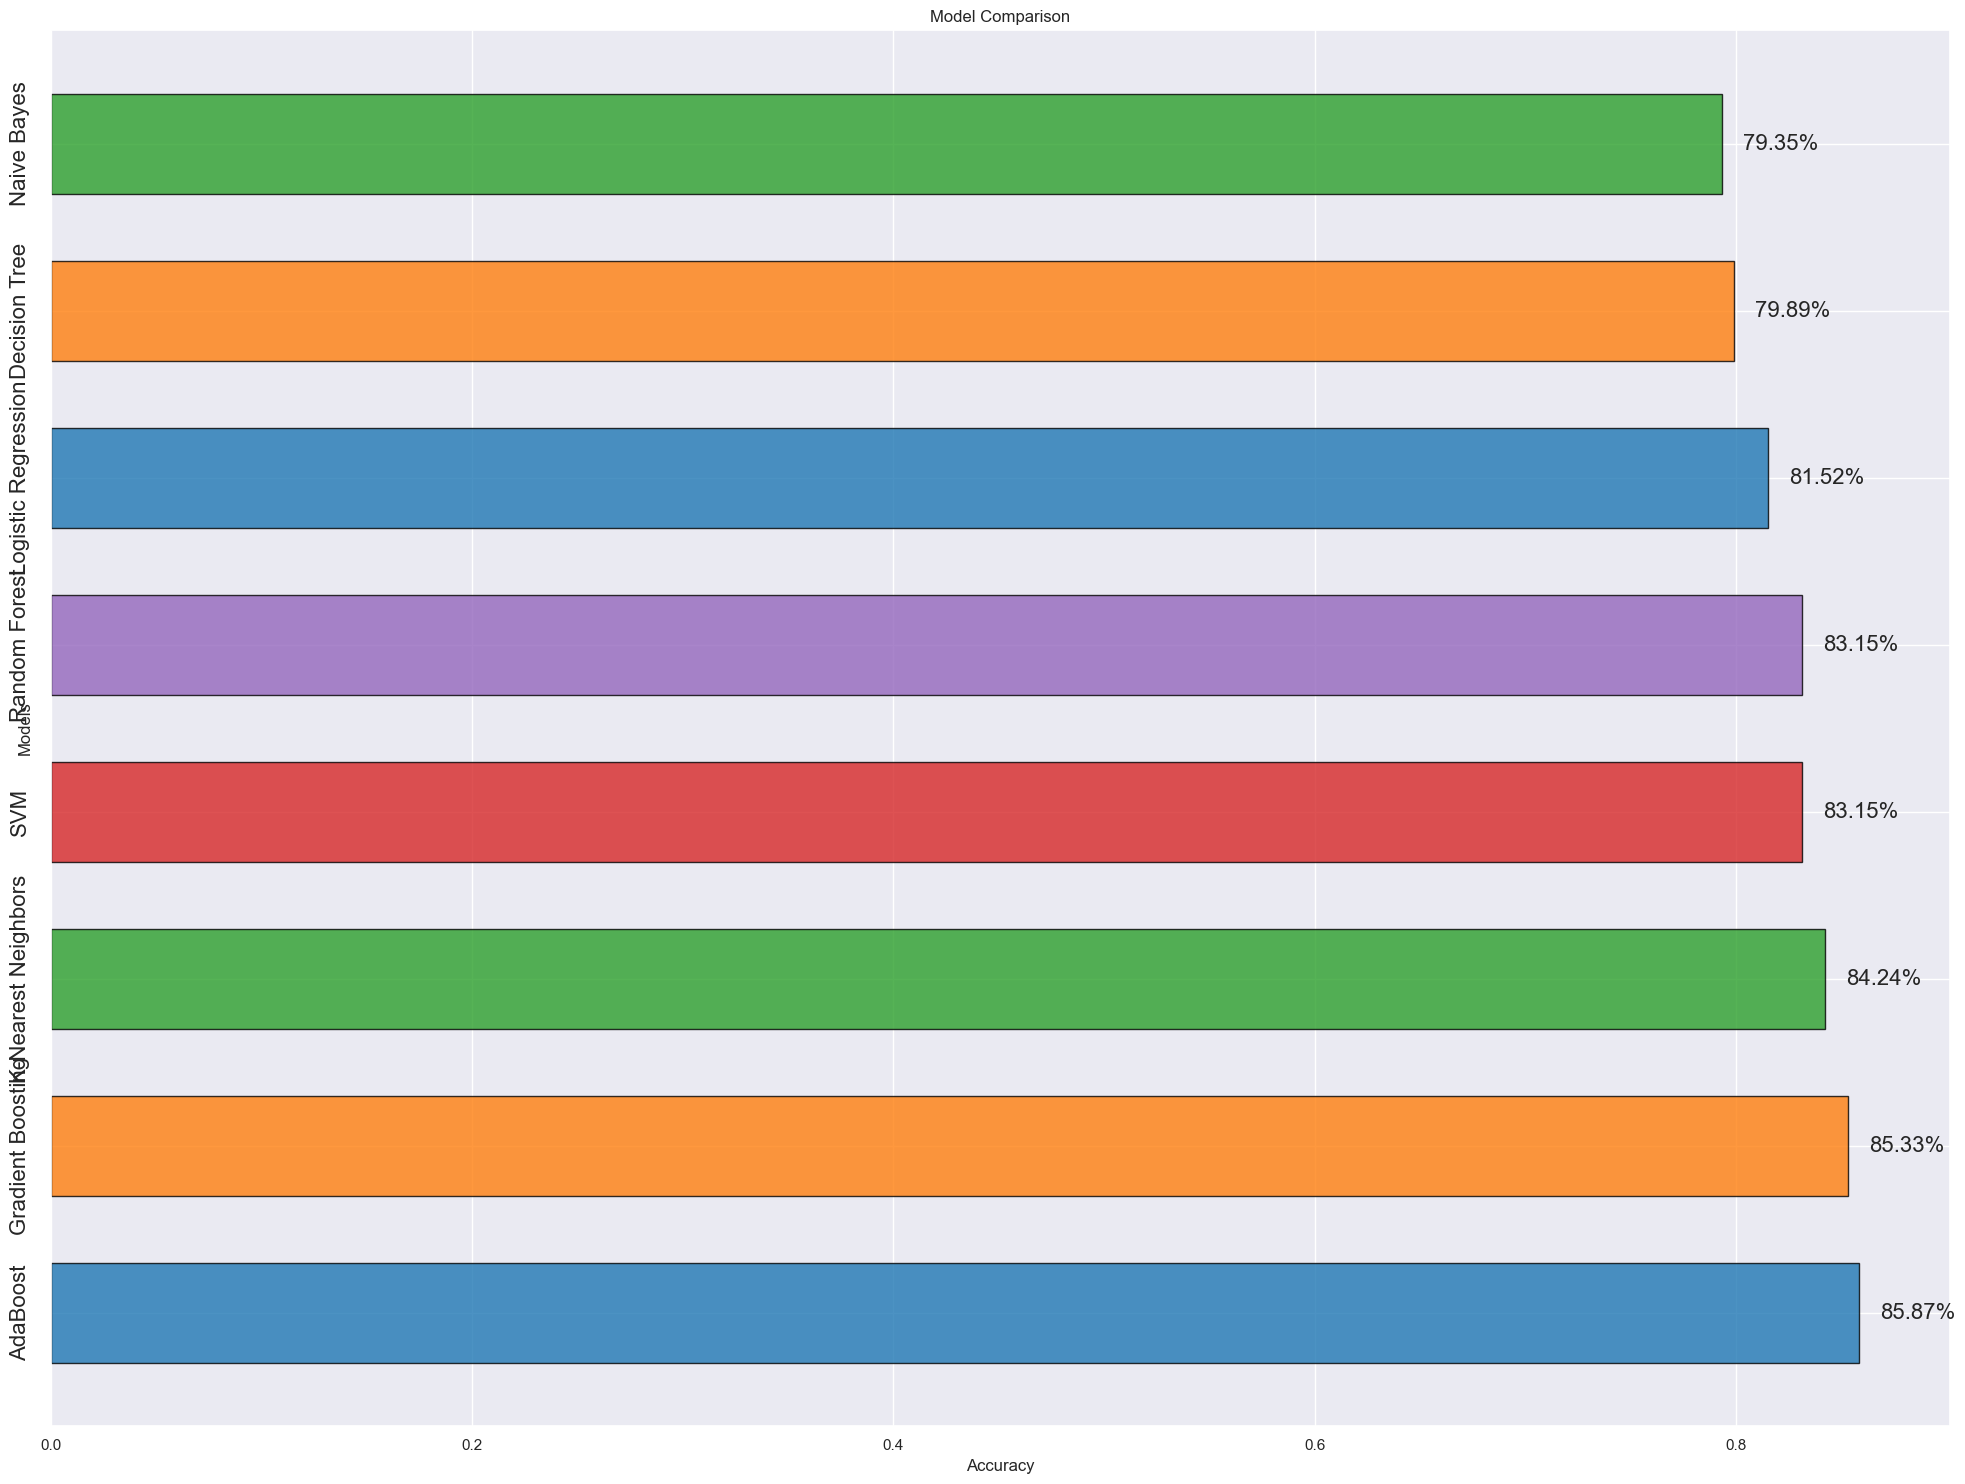

In [38]:
import matplotlib.pyplot as plt

# Sort accuracies in descending order
accuracies.sort(key=lambda x: x[1], reverse=True)

# Extract model names and accuracies
names, values = zip(*accuracies)

# Set color scheme
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

# Create bar chart
fig, ax = plt.subplots(figsize=(20, 15))
ax.barh(range(len(names)), values, color=colors, edgecolor='black', height=0.6, alpha=0.8, capsize=5, tick_label='')

# Add labels to the bars
for i, (name, acc) in enumerate(zip(names, values)):
    ax.text(acc + 0.01, i, f"{acc:.2%}", ha='left', va='center', fontsize=16)
    ax.text(-0.01, i, name, ha='right', va='center', fontsize=16, rotation=90)

# Set axis labels and title
ax.set_xlabel('Accuracy')
ax.set_ylabel('Models')
ax.set_title('Model Comparison')


# Adjust layout and save plot
plt.subplots_adjust(left=0.3)
plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300)
plt.show()

In [39]:
# Choose the "Ada Boost" model
selected_model = ab_model

# Predict the test set results
y_pred_selected = selected_model.predict(X_test_scaled)
y_pred_selected = (y_pred_selected > 0.5)

# Compute and print the performance metrics for the selected model
print("Performance metrics for Random Forest:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_selected))
print("\n")
print("Classification Report:")
print(classification_report(y_test, y_pred_selected))
print("\n")
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred_selected))


Performance metrics for Random Forest:
Confusion Matrix:
[[68  9]
 [17 90]]


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



Accuracy Score:
0.8586956521739131


In [40]:
# make predictions on the test set using the Ada Boost model
prediction = ab_model.predict(X_test_scaled)

# create a dataframe to display the actual and predicted values for the first 10 samples
cross_checking = pd.DataFrame({'Actual': y_test[:10], 'Predicted': prediction[:10]})

# apply background gradient and font properties to the dataframe style
cross_checking_style = cross_checking.head(10).style.background_gradient(cmap='YlOrRd', subset=['Actual', 'Predicted'])\
                .set_properties(**{'font-family': 'Arial', 'font-size': '14px', 'color': 'navy'})\
                .set_caption('Cross Checking Actual vs Predicted Labels')\
                .set_table_styles([{'selector': 'th', 'props': [('font-size', '14px'), ('text-align', 'center')]},
                                   {'selector': 'td', 'props': [('padding', '8px')]}])\
                .format(precision=2)\
                .set_properties(subset=['Actual', 'Predicted'], **{'border': '1px solid black'})

# display the styled dataframe
display(cross_checking_style)

In [41]:
import pickle
with open('model_ab', 'wb') as f:
    pickle.dump(ab_model,f)